In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_data = pd.read_csv('내국인출국교통수단별.csv ',encoding = 'cp949',header = 1)
pd_data.columns = ['시점','공항','항구']
pd_data.head() # 시점, 공항 , 항구

# 공항, 항구 년중 월별 출국 인원 plot
# normalization / standardization 적용, plot 

# 2015년부터 2022년까지 추이 보기
print(pd_data[:10])

        시점      공항     항구
0  2015.01  226687  50545
1  2015.02  173950  44152
2  2015.03  175351  36822
3  2015.04  195851  46589
4  2015.05  199356  54680
5  2015.06  165805  36952
6  2015.07  200675  45586
7  2015.08  229054  58726
8  2015.09  184773  40296
9  2015.10  233248  51427


In [34]:
pd_data.dtypes
yr = pd_data['시점']//1
mo = (pd_data['시점']%1)*100

str_time = pd_data['시점'].astype('str')
yr = str_time.apply(lambda)

시점         datetime64[ns]
공항                  int64
항구                  int64
공항_norm           float64
항구_norm           float64
공항_std            float64
항구_std            float64
dtype: object

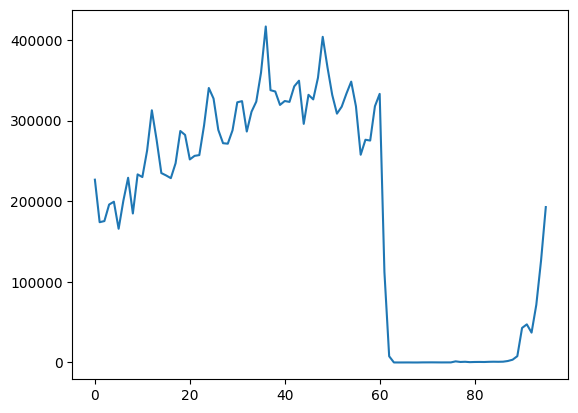

In [21]:
_,axe = plt.subplots()
axe.plot(pd_data['공항'])


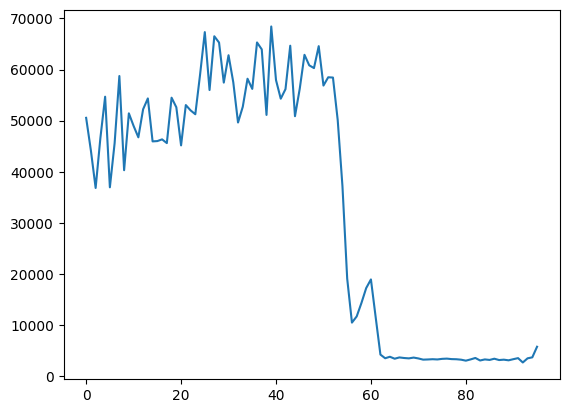

In [23]:
_,axe = plt.subplots()
axe.plot(pd_data['항구'])


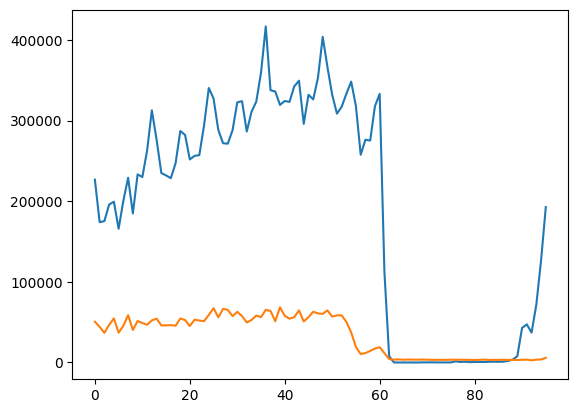

In [28]:
_,axe = plt.subplots()
axe.plot(pd_data['공항'])
axe.plot(pd_data['항구'])

#.sort_values()
#.sort_index()

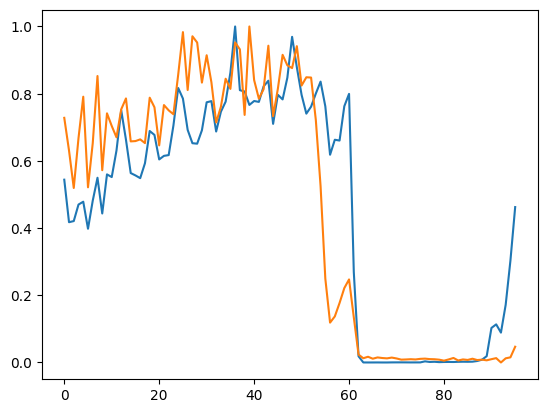

In [30]:
# normalization
a_min = pd_data['공항'].min()
a_max = pd_data['공항'].max()
pd_data['공항_norm'] = pd_data['공항'].apply(lambda x:(x-a_min)/(a_max-a_min))

a_min = pd_data['항구'].min()
a_max = pd_data['항구'].max()
pd_data['항구_norm'] = pd_data['항구'].apply(lambda x:(x-a_min)/(a_max-a_min))

_,axe = plt.subplots()
axe.plot(pd_data['공항_norm'])
axe.plot(pd_data['항구_norm'])

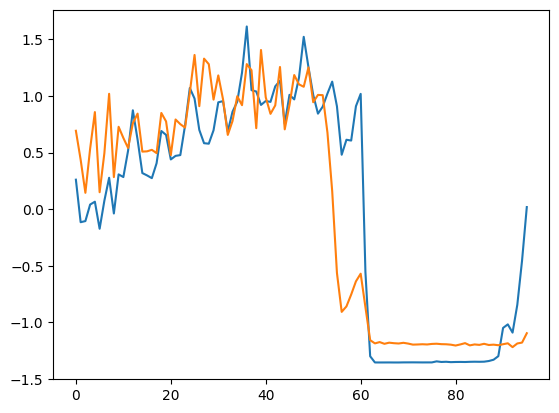

In [33]:
# standardization 
a_mean = pd_data['공항'].mean()
a_std = pd_data['공항'].std()
pd_data['공항_std'] = pd_data['공항'].apply(lambda x: (x-a_mean)/a_std)

a_mean = pd_data['항구'].mean()
a_std = pd_data['항구'].std()
pd_data['항구_std'] = pd_data['항구'].apply(lambda x: (x-a_mean)/a_std)

_,axe = plt.subplots()
axe.plot(pd_data['공항_std'])
axe.plot(pd_data['항구_std'])


In [31]:
# 상관도
np.corrcoef(pd_data['공항_norm'],pd_data['항구_norm'])

array([[1.        , 0.88306607],
       [0.88306607, 1.        ]])